### HYPOTHESIS TESTING

- Ejercicio 1
Coge un conjunto de datos de tema deportivo que te guste y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%. 



* H0: There is no statistical relationship between gold medals won by gender
* H1: There is statistical relationship in gold medals won by gender

To test whether the H0 can be rejected, a Chi-Square test must be made.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [52]:
df = pd.read_csv('../Entrega11/athlete_events.csv')
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [54]:
oro = df[df['Medal']== 'Gold']
bysex = oro['Sex']
bysex.to_frame()
bysex.value_counts()



M    9625
F    3747
Name: Sex, dtype: int64

In [55]:
freq_table = pd.crosstab(df["Medal"], df["Sex"])
print(freq_table)

Sex        F     M
Medal             
Bronze  3771  9524
Gold    3747  9625
Silver  3735  9381


In [56]:
stat, p, dof, expected = stats.chi2_contingency(freq_table)

In [57]:
print(stat)
print(p)
print(dof)
print(expected)

0.7370838511988413
0.691742207283466
2
[[3760.61722344 9534.38277656]
 [3782.39740593 9589.60259407]
 [3709.98537064 9406.01462936]]


The previous results indicate there is no statistically significant relationship between wining a gold medal and being either man or woman since p > 0.05

- Ejercicio 2
Continúa con el conjunto de datos de tema deportivo que te guste y selecciona otros dos atributos del conjunto de datos. Calcula los p-valores y di si rechazan la hipótesis nula cogiendo un alfa de 5%.

* H0: There is no relationship between the season and the weight of the athlete.
* H1: There a relationship between the season and the weight of the athlete.

<AxesSubplot:xlabel='Season', ylabel='Weight'>

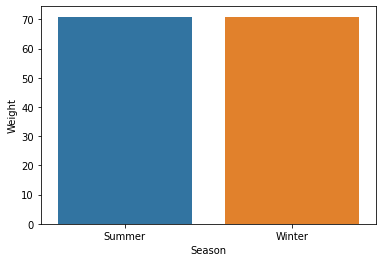

In [81]:
#Plot some bars to see how is the distribution of the variables
Weight = df['Weight']
Season = df['Season']

sns.barplot(data= df, x=Season, y= Weight)
#The bar plots show similar distribution of weights for summer and winter, nevertheless no relation can seen from the. 

(array([222552.,  48564.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

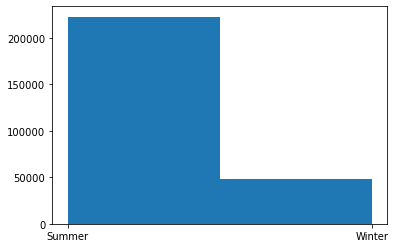

In [89]:
plt.hist(Season, bins= 2)
#A relevant point to take into account is that the distribution for summer and winter competitions winners is uneven. 

In [88]:
freq_table_2 = pd.crosstab(Weight, Season)
print(freq_table_2)

Season  Summer  Winter
Weight                
25.0         6       0
28.0        14       0
30.0        42       0
31.0        23       0
32.0        40       1
...        ...     ...
180.0        1       0
182.0        2       0
190.0        1       0
198.0        1       0
214.0        2       0

[220 rows x 2 columns]


In [92]:
stat, p, dof, expected = stats.chi2_contingency(freq_table_2)

In [93]:
print(stat)
print(p)
print(dof)
print(expected)

2117.8147699687097
1.6828245550497372e-307
219
[[4.86065664e+00 1.13934336e+00]
 [1.13415322e+01 2.65846783e+00]
 [3.40245965e+01 7.97540350e+00]
 [1.86325171e+01 4.36748287e+00]
 [3.32144871e+01 7.78551294e+00]
 [4.13155815e+01 9.68441853e+00]
 [5.91379892e+01 1.38620108e+01]
 [7.45300685e+01 1.74699315e+01]
 [1.10984993e+02 2.60150067e+01]
 [1.40148933e+02 3.28510668e+01]
 [1.57971341e+02 3.70286591e+01]
 [1.58781450e+02 3.72185497e+01]
 [3.01360712e+02 7.06392881e+01]
 [2.09818345e+02 4.91816549e+01]
 [2.78677648e+02 6.53223525e+01]
 [4.22067019e+02 9.89329815e+01]
 [3.58068373e+02 8.39316273e+01]
 [6.04341643e+02 1.41658357e+02]
 [6.29455035e+02 1.47544965e+02]
 [8.41703709e+02 1.97296291e+02]
 [1.59186505e+03 3.73134949e+02]
 [8.10109441e-01 1.89890559e-01]
 [8.99221479e+02 2.10778521e+02]
 [2.43032832e+00 5.69671678e-01]
 [2.09575312e+03 4.91246877e+02]
 [1.48979126e+03 3.49208739e+02]
 [1.62021888e+00 3.79781119e-01]
 [2.79487757e+03 6.55122430e+02]
 [2.26830643e+01 5.31693567e+

The previous results indicate there is no statistically significant relationship between wining a gold medal and being season and the weight of the athlete p > 0.05


- Ejercicio 3
Continúa con el conjunto de datos de tema deportivo que te guste y selecciona tres atributos del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.

* H0: There is a no relationship between age and type of medal won.
* H1: There is a relationship between the age and type of medal won.

<AxesSubplot:xlabel='Medal', ylabel='Age'>

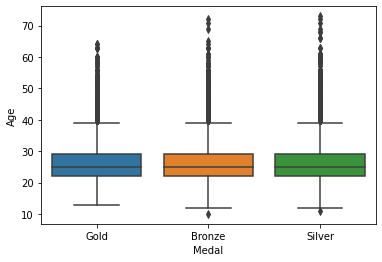

In [73]:
#Explore the data distribution with some boxplots. 
sns.boxplot(x='Medal', y='Age', data=df)


Seems the average age is the same for all categories. Nevertheless, there are multiple outliers that should be taken into consideration when testing.

In [69]:

df_new = df[['Medal', 'Age']]
df_new.dropna(inplace= True)
df_new = pd.DataFrame(df_new)
df_new


c:\Users\vaorc\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Medal,Age
3,Gold,34.0
37,Bronze,30.0
38,Bronze,30.0
40,Bronze,28.0
41,Bronze,28.0
...,...,...
271078,Silver,25.0
271080,Bronze,33.0
271082,Bronze,28.0
271102,Bronze,19.0


In [78]:
#Create different groups by medal to test if there is a significant difference in age and medal won.
Bronze = df_new[df_new['Medal']=='Bronze']['Age']
Silver = df_new[df_new['Medal']=='Silver']['Age']
Gold = df_new[df_new['Medal']=='Gold']['Age']
#from scipy.stats import f_oneway

In [79]:
#Perform the one way anova, which allows us to test our hypothesis and therefore see if there is a statistically significant difference between ages among medals.
stats.f_oneway(Bronze, Silver, Gold)

F_onewayResult(statistic=1.4415127134142867, pvalue=0.23658221471061605)

The previous results show p>0.05, which means that the null hypothesis can't be rejected and there is no relationship between age and type of medal won.